In [7]:
import matplotlib.pyplot as plt
import numpy as np


In [8]:
def load_image(file_path):
    image = plt.imread(file_path)
    if image.shape[-1] == 4:  # PNG with transparency
        image = image[:, :, :3]
    if image.dtype == np.uint8:
        image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
    # Convert RGB to Grayscale if necessary
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = np.mean(image, axis=2)
    return image

In [9]:
# Brightness adjustment function
def adjust_brightness(image, value):
    value_normalized = value / 255.0  # Convert to [0,1] scale
    brightened_image = np.clip(image + value_normalized, 0, 1)  # Ensure valid range
    return brightened_image

In [10]:
# Contrast enhancement function
def enhance_contrast(image):
    min_val = np.min(image)
    max_val = np.max(image)
    if max_val == min_val:  # Avoid division by zero
        return image
    contrast_image = (image - min_val) / (max_val - min_val)  # Normalize
    return contrast_image

In [11]:
# Image smoothing using a mean filter (3x3 kernel)
def smooth_image(image):
    kernel = np.ones((3, 3)) / 9  # Mean filter kernel (3x3)
    padded_image = np.pad(image, pad_width=1, mode='edge')  # Pad edges
    smoothed_image = np.zeros_like(image)

    # Apply filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            smoothed_image[i, j] = np.sum(padded_image[i:i+3, j:j+3] * kernel)

    return smoothed_image

In [12]:
# Histogram Equalization
def histogram_equalization(image):
    # Convert image to 8-bit (0-255) for histogram calculation
    img_8bit = (image * 255).astype(np.uint8)
    # Compute histogram
    hist, bins = np.histogram(img_8bit.flatten(), bins=256, range=[0,256])
    # Compute CDF (Cumulative Distribution Function)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalize to [0,1]
    # Map original pixel values to equalized values
    equalized_image = np.interp(img_8bit.flatten(), bins[:-1], cdf_normalized)  # Apply CDF mapping
    equalized_image = equalized_image.reshape(image.shape)  # Reshape back to original image shape
    return equalized_image

In [13]:
image=load_image("img2gray.jpg")
brightened_image = adjust_brightness(image, 50)  # Increase brightness by 50
contrast_image = enhance_contrast(brightened_image)
smoothed_image = smooth_image(contrast_image)  # Apply smoothing
equalized_image = histogram_equalization(smoothed_image)  # Apply histogram equalization

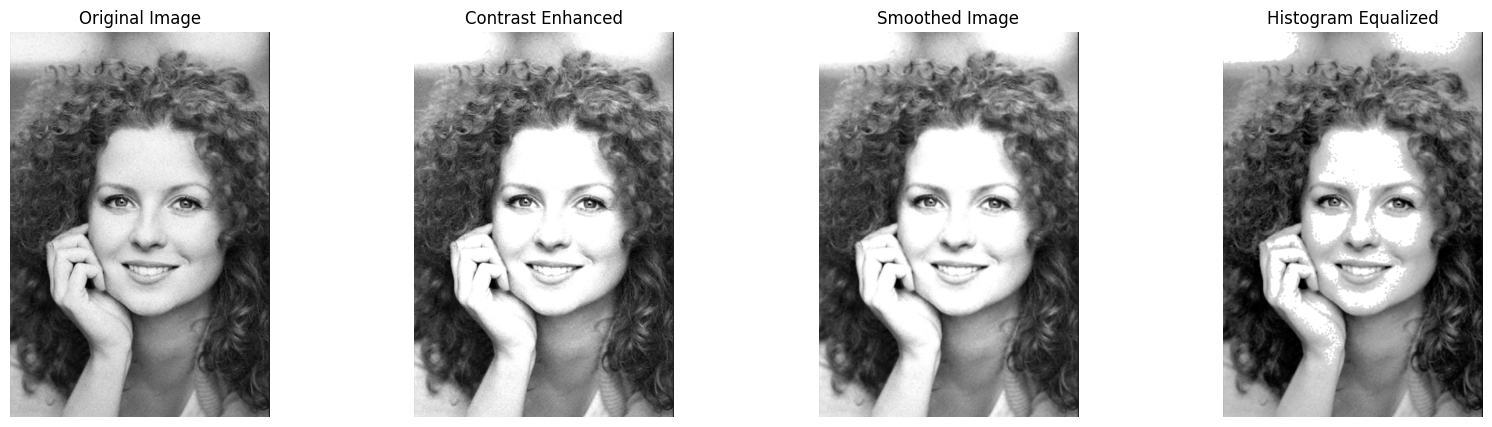

In [14]:
plt.imsave('improved_image.jpg', (equalized_image * 255).astype(np.uint8), cmap='gray')
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')  # Use grayscale colormap
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(contrast_image, cmap='gray')  # Show contrast-enhanced image
plt.title("Contrast Enhanced")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(smoothed_image, cmap='gray')  # Show smoothed image
plt.title("Smoothed Image")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(equalized_image, cmap='gray')  # Show histogram equalized image
plt.title("Histogram Equalized")
plt.axis('off')

plt.show()


Explanation

Problems in the Original Image:

Low Brightness: The original image had a maximum intensity of 245 instead of 255, indicating slightly reduced brightness.

Poor Contrast: The pixel intensity range was compressed, making the image appear washed out.

Noticeable Noise: The image contained some grainy textures, which reduced clarity.

Lack of Sharpness: Some finer details were not well-defined.

Applied Transformations:

Brightness Adjustment: Increased brightness by adding 50 intensity points (normalized). This made the image clearer and more visually appealing.

Contrast Enhancement: Used min-max normalization to spread pixel values across the full intensity range, making darker areas darker and brighter areas brighter.

Image Smoothing: Applied a 3x3 mean filter to reduce noise and smooth out rough textures.

Histogram Equalization: Adjusted the image histogram to evenly distribute pixel intensities, enhancing overall contrast and making details more visible.

Final Outcome:

The processed image now has better brightness, improved contrast, reduced noise, and enhanced details. The histogram equalization has further refined the image, making facial features more distinct and improving overall visibility.